# Predicting ticketprice of flights 

In [1666]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1667]:
#Reading the data
flight_train = pd.read_excel('Train.xlsx')
flight_test= pd.read_excel('Test.xlsx')
y_test_actual= pd.read_csv('y_test.csv')

In [1668]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [1669]:
y_test_actual.head()

,TripID,ticketprice
0,Trip12332,5742
1,Trip22633,15286
2,Trip33581,9582
3,Trip36239,13720
4,Trip21625,6338


In [1670]:
flight_train.head()

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route,ticketprice
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,23May2017-12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",24/05/2017 06:40,Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,28May2017-15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),01/06/2017 10:10,Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189
2,Trip4364,Hyderabad,Chennai,Indigo,320,Airbus A320,21May2017-18:05:45,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),26/05/2017 16:35,Chennai (MAA-Chennai Intl.),26/05/2017 17:50,HYD-MAA,5001
3,Trip43336,Hyderabad,Goa,Indigo,320,Airbus A320,02June2017-14:57:27,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),15/06/2017 12:50,Goa (GOI-Dabolim),15/06/2017 14:15,HYD-GOI,2622
4,Trip2628,Bengaluru,Hyderabad,Indigo,320,Airbus A320,21May2017-17:14:38,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",25/05/2017 08:20,Hyderabad (HYD-Rajiv Gandhi Intl.),25/05/2017 09:30,BLR-HYD,16704


In [1671]:
flight_test.head()

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route
0,Trip12332,Mumbai,Tirupati,Indigo,320,Airbus A320,26May2017-10:20:18,INR,Mumbai (BOM-Chhatrapati Shivaji Intl.),12/06/2017 02:35,Tirupati (TIR),12/06/2017 07:50,BOM-HYD-TIR
1,Trip22633,Hyderabad,Pune,Vistara,320,Airbus A320,29May2017-16:19:03,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),03/06/2017 06:05,Pune (PNQ-Lohegaon),03/06/2017 19:45,HYD-DEL-PNQ
2,Trip33581,Mumbai,Bhubaneshwar,Indigo,320,Airbus A320,01June2017-18:52:18,INR,Mumbai (BOM-Chhatrapati Shivaji Intl.),24/10/2017 17:45,Bhubaneshwar (BBI-Biju Patnaik),25/10/2017 01:00,BOM-DEL-BBI
3,Trip36239,Hyderabad,Varanasi,Vistara,320,Airbus A320,01June2017-15:22:54,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),07/06/2017 16:05,Varanasi (VNS-Babatpur),08/06/2017 14:45,HYD-BOM-DEL-VNS
4,Trip21625,Hyderabad,Varanasi,Indigo,320,Airbus A320,28May2017-11:48:37,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),05/07/2017 12:10,Varanasi (VNS-Babatpur),05/07/2017 19:00,HYD-BOM-VNS


In [1672]:
flight_train.shape

(24000, 14)

In [1673]:
flight_test.shape

(6000, 13)

In [1674]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TripID               24000 non-null  object
 1   departure            24000 non-null  object
 2   arrival              24000 non-null  object
 3   airline              24000 non-null  object
 4   planecode            24000 non-null  object
 5   plane                24000 non-null  object
 6   Bookingdate          24000 non-null  object
 7   currencyCode         24000 non-null  object
 8   departure_airport    24000 non-null  object
 9   departure_date_time  24000 non-null  object
 10  arrival_airport      24000 non-null  object
 11  arrival_date_time    24000 non-null  object
 12  Route                24000 non-null  object
 13  ticketprice          24000 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.6+ MB


In [1675]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TripID               6000 non-null   object
 1   departure            6000 non-null   object
 2   arrival              6000 non-null   object
 3   airline              6000 non-null   object
 4   planecode            6000 non-null   object
 5   plane                6000 non-null   object
 6   Bookingdate          6000 non-null   object
 7   currencyCode         6000 non-null   object
 8   departure_airport    6000 non-null   object
 9   departure_date_time  6000 non-null   object
 10  arrival_airport      6000 non-null   object
 11  arrival_date_time    6000 non-null   object
 12  Route                6000 non-null   object
dtypes: object(13)
memory usage: 609.5+ KB


In [1676]:
#Checking for null values
flight_train.isnull().sum()

TripID                 0
departure              0
arrival                0
airline                0
planecode              0
plane                  0
Bookingdate            0
currencyCode           0
departure_airport      0
departure_date_time    0
arrival_airport        0
arrival_date_time      0
Route                  0
ticketprice            0
dtype: int64

In [1677]:
flight_test.isnull().sum()

TripID                 0
departure              0
arrival                0
airline                0
planecode              0
plane                  0
Bookingdate            0
currencyCode           0
departure_airport      0
departure_date_time    0
arrival_airport        0
arrival_date_time      0
Route                  0
dtype: int64

In [1678]:
trip_id_train = flight_train['TripID']
trip_id_test = flight_test['TripID']

## Data Visualizations

### Pre-processing visualizations

<Figure size 400x400 with 0 Axes>

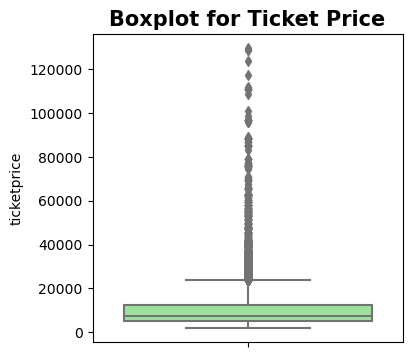

In [1679]:
# Boxplot for ticketprice
plt.figure(figsize=(4,4))
sns.boxplot(y='ticketprice',data=flight_train, color='lightgreen')
plt.title('Boxplot for Ticket Price',fontsize=15, weight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show(True)

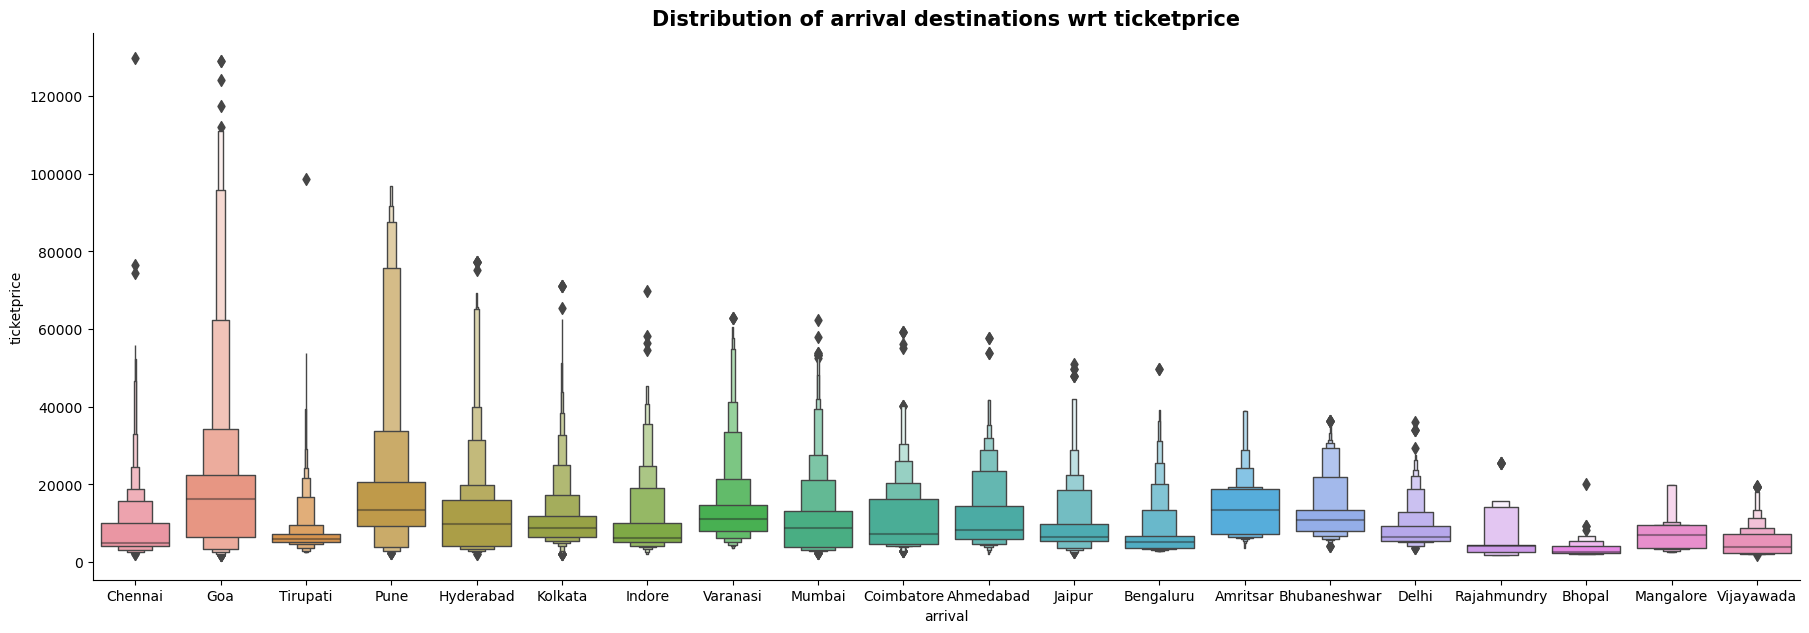

In [1680]:
# Distribution of arrival destinations with respect to ticketprice
sns.catplot(y='ticketprice' , x='arrival' ,
            data = flight_train.sort_values('ticketprice',ascending=False) ,
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of arrival destinations wrt ticketprice',fontsize=15, weight="bold")
plt.show(True)

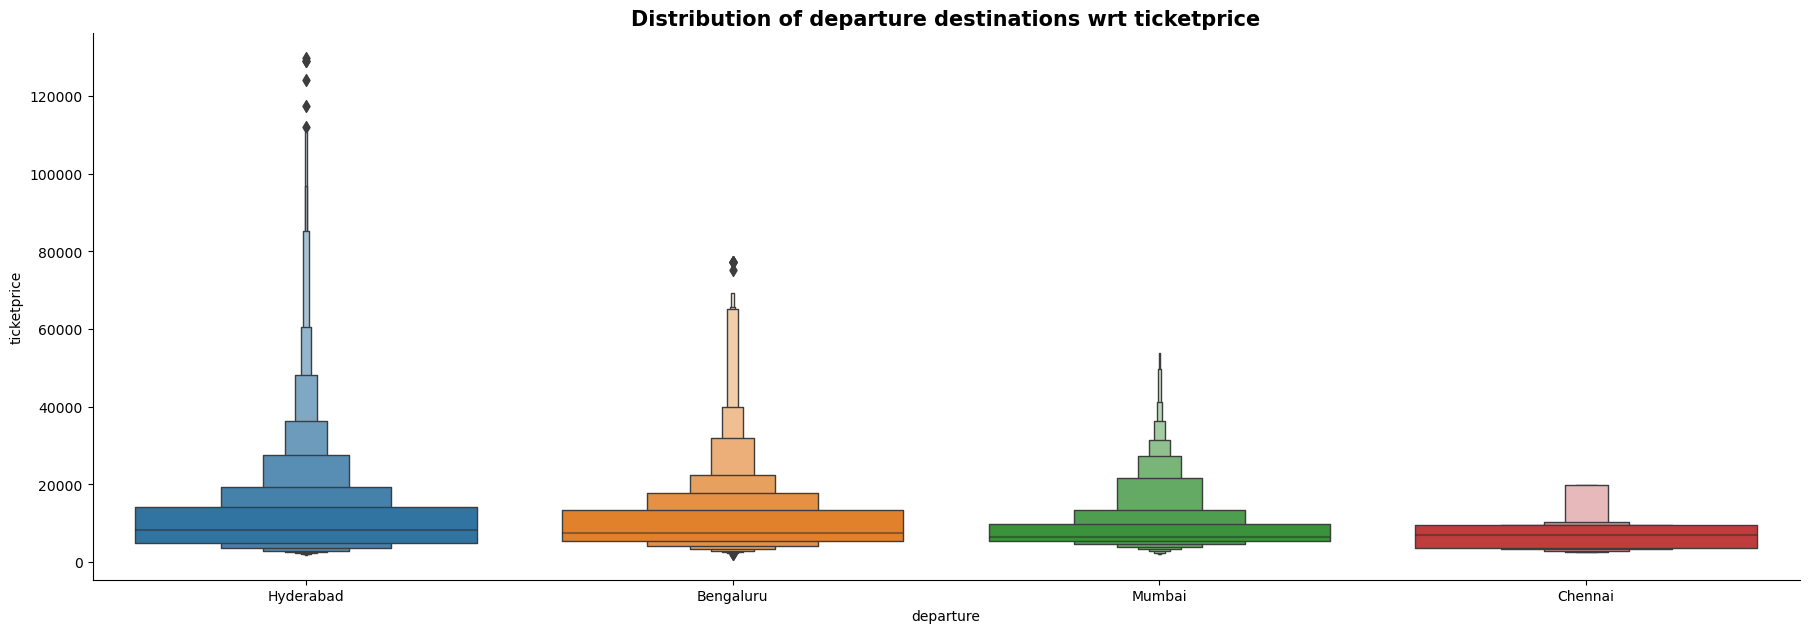

In [1681]:
# Distribution of departure destinations with respect to ticketprice
sns.catplot(y='ticketprice' , x='departure' ,
            data = flight_train.sort_values('ticketprice',ascending=False) ,
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of departure destinations wrt ticketprice',fontsize=15, weight="bold")
plt.show(True)

#### Flights leaving from Hyderabad are costlier

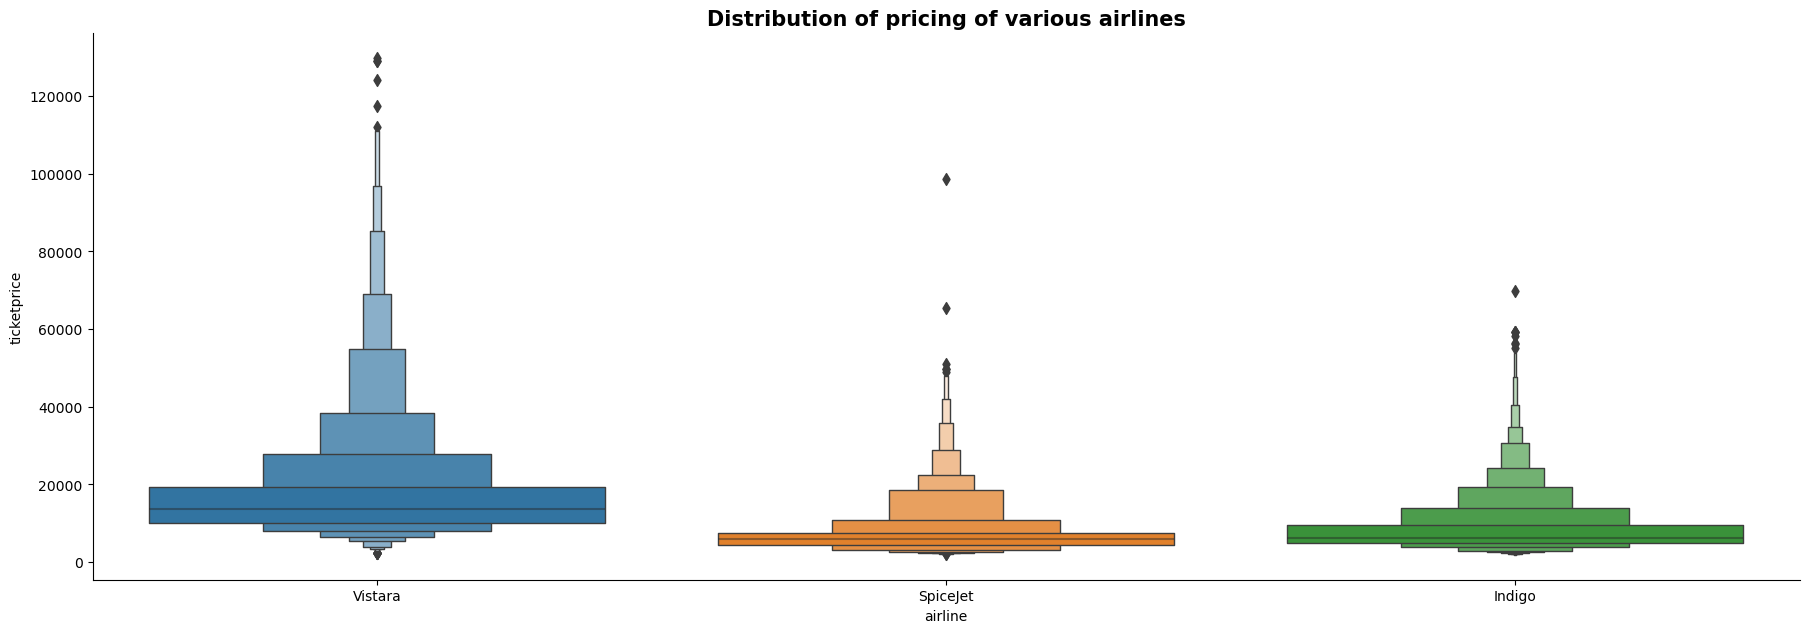

In [1682]:
# Distribution of pricing of various airlines
sns.catplot(y='ticketprice' , x='airline' ,
            data = flight_train.sort_values('ticketprice',ascending=False) , 
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of pricing of various airlines',fontsize=15, weight="bold")
plt.show(True)

### Ticketprice of Vistara are higher than Spicejet and Indigo.

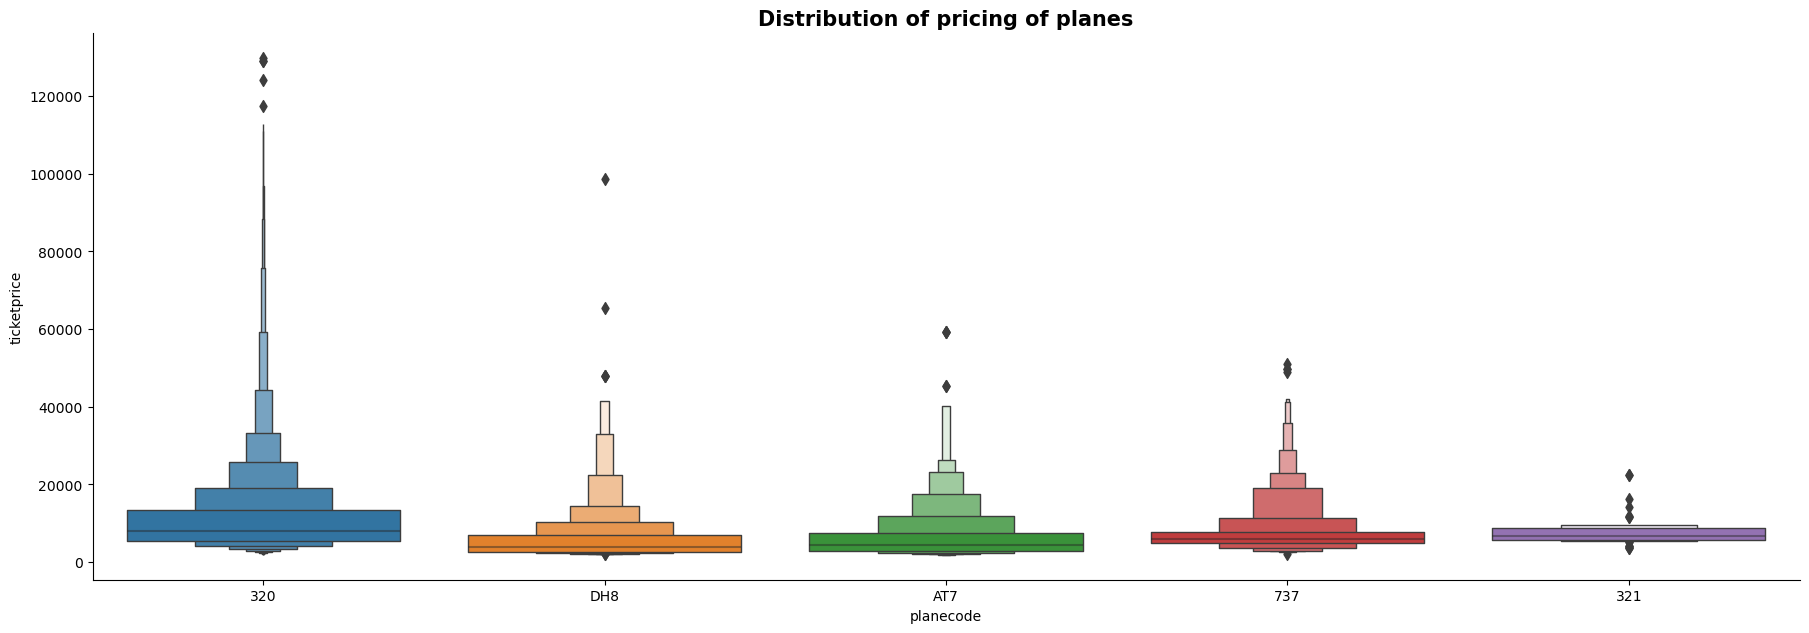

In [1683]:
# Distribution of pricing of planes
sns.catplot(y='ticketprice' , x='planecode' ,
            data = flight_train.sort_values('ticketprice',ascending=False) , 
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of pricing of planes',fontsize=15, weight="bold")
plt.show(True)

# Pre-processing 

### Train Data

In [1684]:
# Creating new columns from departure and arrival date time columns
from datetime import datetime, date

flight_train['Journey_Day'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M').dt.day
flight_train['Journey_WeekDay'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M').dt.weekday
flight_train['Journey_Month'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M').dt.month
flight_train['Depature_Time'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M').dt.time
flight_train['Arrival_Time'] = pd.to_datetime(flight_train.arrival_date_time , format = '%d/%m/%Y %H:%M').dt.time

flight_train['Dep_hour'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M' ).dt.hour
flight_train['Dep_Minute'] = pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M' ).dt.minute

flight_train['Arrival_hour'] = pd.to_datetime(flight_train.arrival_date_time , format = '%d/%m/%Y %H:%M').dt.hour
flight_train['Arrival_Minute'] = pd.to_datetime(flight_train.arrival_date_time , format = '%d/%m/%Y %H:%M').dt.minute
flight_train.head(2)

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route,ticketprice,Journey_Day,Journey_WeekDay,Journey_Month,Depature_Time,Arrival_Time,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,23May2017-12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",24/05/2017 06:40,Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884,24,2,5,06:40:00,14:10:00,6,40,14,10
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,28May2017-15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),01/06/2017 10:10,Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189,1,3,6,10:10:00,05:20:00,10,10,5,20


In [1685]:
# Creating columns: day of week of booking, hour of booking
flight_train['booking_day'] =pd.to_datetime(flight_train.Bookingdate , format = "%d%B%Y-%H:%M:%S").dt.weekday
flight_train['Bookingdate_hour'] =pd.to_datetime(flight_train.Bookingdate , format = "%d%B%Y-%H:%M:%S").dt.hour

In [1686]:
#Creating column: if the booking was done in Peak season or not
def season (x):
    if x in range(5,9):
        return 'Off Peak Season'
    else:
        return 'Peak Season'


flight_train['Season']=flight_train['Journey_Month'].apply(season)

In [1687]:
#Creating column: if the booking was done in Peak Hours or not
def get_day_period(x):
    if x in range(8,11):
        return 'Peak Hours'
    else:
        return 'Off Peak Hours'

flight_train['Daytime']=flight_train['Bookingdate_hour'].apply(get_day_period)

In [1688]:
flight_train.head(2)

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route,ticketprice,Journey_Day,Journey_WeekDay,Journey_Month,Depature_Time,Arrival_Time,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,booking_day,Bookingdate_hour,Season,Daytime
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,23May2017-12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",24/05/2017 06:40,Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884,24,2,5,06:40:00,14:10:00,6,40,14,10,1,12,Off Peak Season,Off Peak Hours
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,28May2017-15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),01/06/2017 10:10,Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189,1,3,6,10:10:00,05:20:00,10,10,5,20,6,15,Off Peak Season,Off Peak Hours


In [1689]:
# Finding duration of a flight in minutes, and adding it as a new column

from datetime import datetime
a=[]
b=[]
c=[]
mins=[]
for d in flight_train.departure_date_time:
    date1 = (datetime.strptime(d, "%d/%m/%Y %H:%M"))
    a.append(date1)
for d in flight_train.arrival_date_time:
    date2 = datetime.strptime(d, "%d/%m/%Y %H:%M")   
    b.append(date2)
for i in range(len(flight_train.arrival_date_time)):
    difference= b[i]-a[i]
    c.append(difference)
    minutes =(b[i]-a[i]).total_seconds() / 60
    mins.append(minutes)

flight_train['mins_of_journey']= mins

In [1690]:
flight_train.head(2)

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route,ticketprice,Journey_Day,Journey_WeekDay,Journey_Month,Depature_Time,Arrival_Time,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,booking_day,Bookingdate_hour,Season,Daytime,mins_of_journey
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,23May2017-12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",24/05/2017 06:40,Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884,24,2,5,06:40:00,14:10:00,6,40,14,10,1,12,Off Peak Season,Off Peak Hours,450.0
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,28May2017-15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),01/06/2017 10:10,Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189,1,3,6,10:10:00,05:20:00,10,10,5,20,6,15,Off Peak Season,Off Peak Hours,1150.0


In [1691]:
# Creating a column to find how many days before the flight was the ticket booked
flight_train.departure_date_time =pd.to_datetime(flight_train.departure_date_time , format = '%d/%m/%Y %H:%M')
flight_train['Bookingdate'] =pd.to_datetime(flight_train.Bookingdate , format = "%d%B%Y-%H:%M:%S")
flight_train['prrior_booking_days'] = (flight_train['departure_date_time']-flight_train['Bookingdate']  ).dt.days     

flight_train.head(2)

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,departure_date_time,arrival_airport,arrival_date_time,Route,ticketprice,Journey_Day,Journey_WeekDay,Journey_Month,Depature_Time,Arrival_Time,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,booking_day,Bookingdate_hour,Season,Daytime,mins_of_journey,prrior_booking_days
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,2017-05-23 12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",2017-05-24 06:40:00,Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884,24,2,5,06:40:00,14:10:00,6,40,14,10,1,12,Off Peak Season,Off Peak Hours,450.0,0
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,2017-05-28 15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),2017-06-01 10:10:00,Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189,1,3,6,10:10:00,05:20:00,10,10,5,20,6,15,Off Peak Season,Off Peak Hours,1150.0,3


In [1692]:
flight_train.drop(columns=['Depature_Time' , 'departure_date_time'],inplace=True)

In [1693]:
flight_train.drop(columns='Arrival_Time',inplace=True)

In [1694]:
# If the flight was direct or a connecting flight.
stops=[]    
for i in range(len(flight_train.Route)):
    counter= flight_train.Route[i].count('-')
    stops.append(counter-1)

flight_train['No_of_stops']= stops

flight_train.head(2)

,TripID,departure,arrival,airline,planecode,plane,Bookingdate,currencyCode,departure_airport,arrival_airport,arrival_date_time,Route,ticketprice,Journey_Day,Journey_WeekDay,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,booking_day,Bookingdate_hour,Season,Daytime,mins_of_journey,prrior_booking_days,No_of_stops
0,Trip8907,Bengaluru,Delhi,Vistara,320,Airbus A320,2017-05-23 12:40:46,INR,"Bengaluru, India (BLR-Kempegowda Intl.)",Delhi (DEL-Indira Gandhi Intl.),24/05/2017 14:10,BLR-BOM-DEL,10884,24,2,5,6,40,14,10,1,12,Off Peak Season,Off Peak Hours,450.0,0,1
1,Trip19142,Hyderabad,Pune,Vistara,320,Airbus A320,2017-05-28 15:22:34,INR,Hyderabad (HYD-Rajiv Gandhi Intl.),Pune (PNQ-Lohegaon),02/06/2017 05:20,HYD-DEL-PNQ,21189,1,3,6,10,10,5,20,6,15,Off Peak Season,Off Peak Hours,1150.0,3,1


In [1695]:
# Getting value_counts of different categorical columns and dummifying categorical columns
flight_train['No_of_stops'].value_counts()

1    15463
0     6839
2     1698
Name: No_of_stops, dtype: int64

In [1696]:
flight_train['planecode'].value_counts()

320    19960
737     2682
AT7      727
DH8      569
321       62
Name: planecode, dtype: int64

In [1697]:
flight_train['plane'].value_counts()
#planecode and plane give the same info

Airbus A320          19960
Boeing 737            2682
ATR 72                 727
De Havilland 8         472
Dehavilland DHC-8       97
Airbus A321             62
Name: plane, dtype: int64

In [1698]:
planecode = flight_train['planecode']
planecode = pd.get_dummies(planecode , drop_first=True)
planecode.head()

,321,737,AT7,DH8
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [1699]:
Season= flight_train['Season']
Season= pd.get_dummies(Season, drop_first=True)
Season.head(2)

,Peak Season
0,0
1,0


In [1700]:
daytime = flight_train['Daytime']
daytime = pd.get_dummies(daytime , drop_first=True)
daytime.head(2)

,Peak Hours
0,0
1,0


In [1701]:
flight_train['currencyCode'].value_counts()
# currencyCode gives no info
# TripID gives no info

INR    24000
Name: currencyCode, dtype: int64

In [1702]:
flight_train['airline'].value_counts()

Indigo      14733
Vistara      6016
SpiceJet     3251
Name: airline, dtype: int64

In [1703]:
airline = flight_train['airline']
airline = pd.get_dummies(airline , drop_first=True)
airline.head()

,SpiceJet,Vistara
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1704]:
flight_train['departure_airport'].value_counts()
#same as departure

Hyderabad (HYD-Rajiv Gandhi Intl.)          13496
Mumbai (BOM-Chhatrapati Shivaji Intl.)       7095
Bengaluru, India (BLR-Kempegowda Intl.)      2554
Bengaluru (BLR-Kempegowda Intl.)              573
Chennai (MAA-Chennai Intl.)                   282
Name: departure_airport, dtype: int64

In [1705]:
flight_train['departure'].value_counts()

Hyderabad    13496
Mumbai        7095
Bengaluru     3127
Chennai        282
Name: departure, dtype: int64

In [1706]:
departure = flight_train[['departure']]

departure = pd.get_dummies(departure , drop_first=True)
departure.head()

,departure_Chennai,departure_Hyderabad,departure_Mumbai
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,0


In [1707]:
flight_train['arrival_airport'].value_counts()
# same as arrival

Tirupati (TIR)                                     3428
Kolkata (CCU-Netaji Subhash Chandra Bose Intl.)    3230
Chennai (MAA-Chennai Intl.)                        2637
Mumbai (BOM-Chhatrapati Shivaji Intl.)             1800
Hyderabad (HYD-Rajiv Gandhi Intl.)                 1572
Delhi (DEL-Indira Gandhi Intl.)                    1555
Varanasi (VNS-Babatpur)                            1500
Ahmedabad (AMD-Sardar Vallabhbhai Patel Intl.)     1181
Bhubaneshwar (BBI-Biju Patnaik)                    1115
Amritsar (ATQ-Raja Sansi Intl.)                    1072
Bengaluru, India (BLR-Kempegowda Intl.)            1006
Pune (PNQ-Lohegaon)                                 681
Indore (IDR-Devi Ahilyabai Holkar Intl.)            585
Goa (GOI-Dabolim)                                   504
Jaipur (JAI-Sanganer)                               471
Coimbatore (CJB)                                    461
Vijayawada (VGA)                                    400
Bengaluru (BLR-Kempegowda Intl.)                

In [1708]:
flight_train['arrival'].value_counts()

Tirupati        3428
Kolkata         3230
Chennai         2637
Mumbai          1800
Hyderabad       1572
Delhi           1555
Varanasi        1500
Bengaluru       1297
Ahmedabad       1181
Bhubaneshwar    1115
Amritsar        1072
Pune             681
Indore           585
Goa              504
Jaipur           471
Coimbatore       461
Vijayawada       400
Mangalore        282
Bhopal           127
Rajahmundry      102
Name: arrival, dtype: int64

In [1709]:
arrival = flight_train[['arrival']]

arrival = pd.get_dummies(arrival , drop_first=True)
arrival.head()

,arrival_Amritsar,arrival_Bengaluru,arrival_Bhopal,arrival_Bhubaneshwar,arrival_Chennai,arrival_Coimbatore,arrival_Delhi,arrival_Goa,arrival_Hyderabad,arrival_Indore,arrival_Jaipur,arrival_Kolkata,arrival_Mangalore,arrival_Mumbai,arrival_Pune,arrival_Rajahmundry,arrival_Tirupati,arrival_Varanasi,arrival_Vijayawada
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [1710]:
y= flight_train.ticketprice

In [1711]:
flight_train.ticketprice.describe()

count     24000.000000
mean      10493.615167
std        9643.537856
min        1810.000000
25%        5112.000000
50%        7397.000000
75%       12562.000000
max      129732.000000
Name: ticketprice, dtype: float64

In [1712]:
flight_train.mins_of_journey.describe()

count    24000.000000
mean       448.192917
std        407.048516
min         60.000000
25%        170.000000
50%        335.000000
75%        520.000000
max       3225.000000
Name: mins_of_journey, dtype: float64

### Post-processing Visualizations

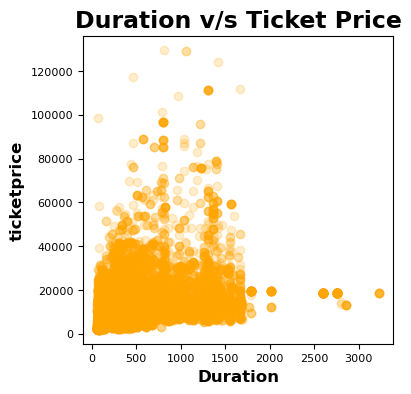

In [1713]:
# Scatter pLot- Duration of the journey v/s Ticketprcie
plt.figure(figsize=(4,4))
plt.scatter(flight_train.mins_of_journey, flight_train["ticketprice"], color='orange', alpha=1/5)
plt.title('Duration v/s Ticket Price',fontsize=17, weight="bold")
plt.xlabel('Duration',fontsize=12, weight="bold")
plt.ylabel('ticketprice',fontsize=12, weight="bold")
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.show(True)

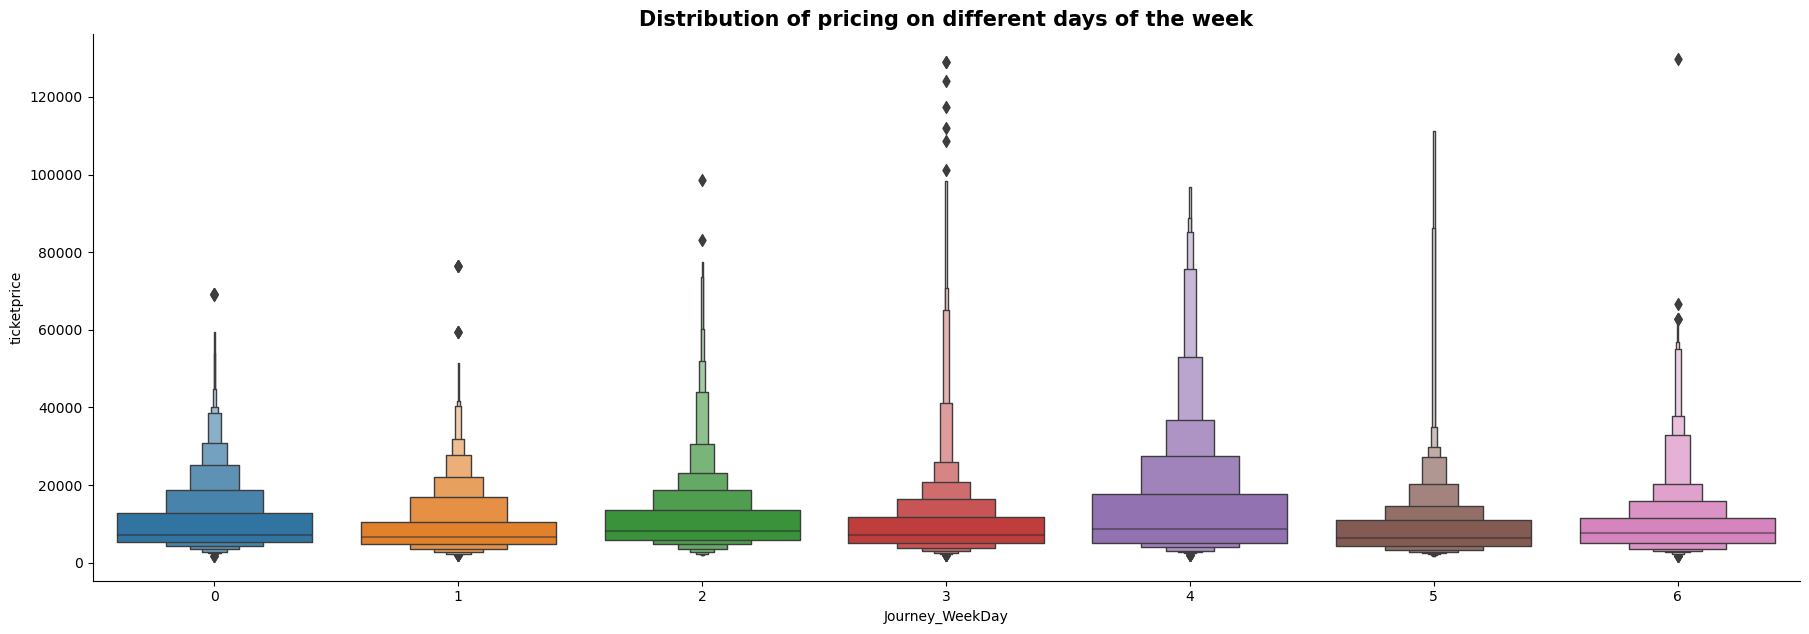

In [1714]:
# Journey_WeekDay v/s ticketprice 
sns.catplot(y='ticketprice' , x='Journey_WeekDay' ,
            data = flight_train.sort_values('ticketprice',ascending=False) ,
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of pricing on different days of the week',fontsize=15, weight="bold")
plt.show(True)

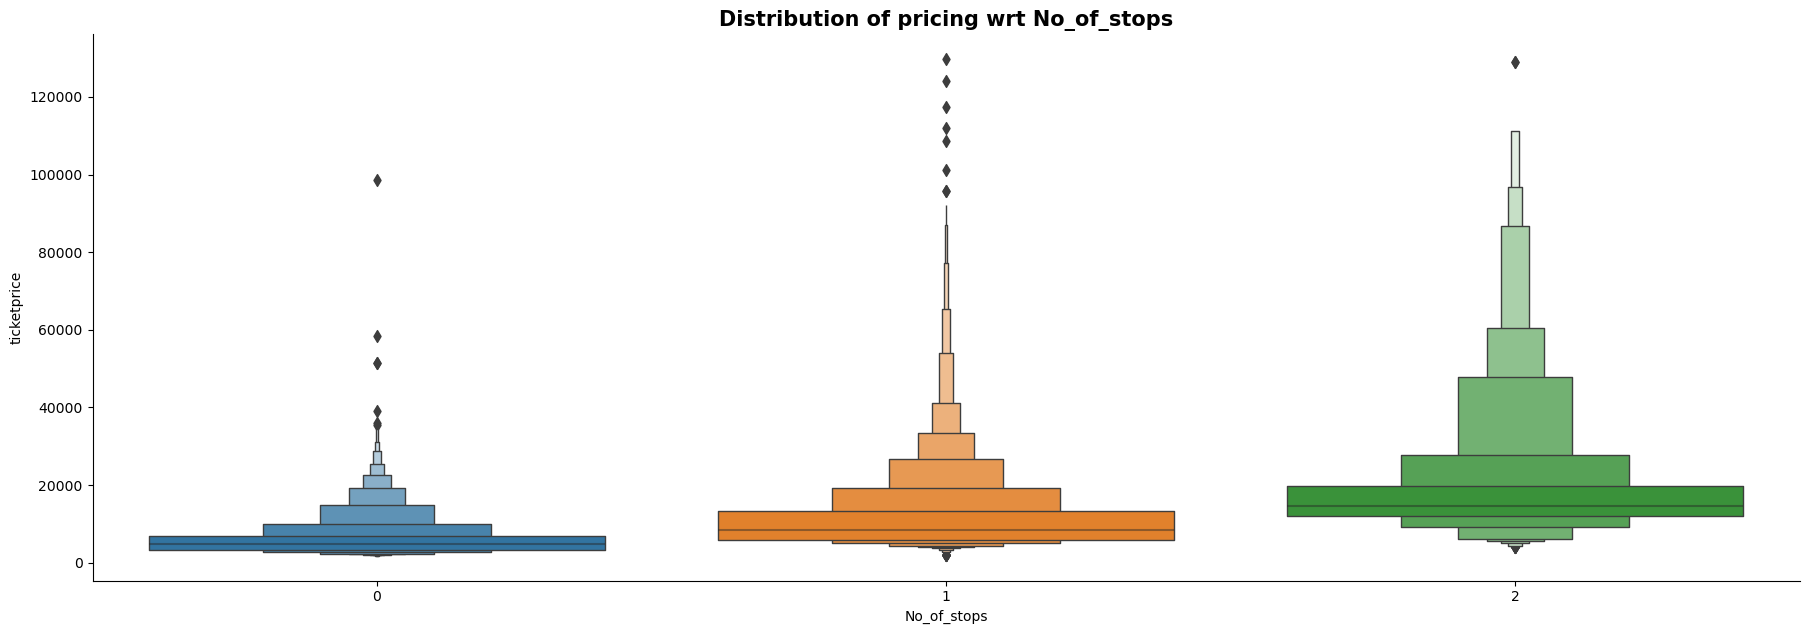

In [1715]:
# No_of_stops v/s ticketprice
sns.catplot(y='ticketprice' , x='No_of_stops' ,
            data = flight_train.sort_values('ticketprice',ascending=False) ,
            kind='boxen' , height=6 , aspect=3)
plt.title('Distribution of pricing wrt No_of_stops',fontsize=15, weight="bold")
plt.show(True)

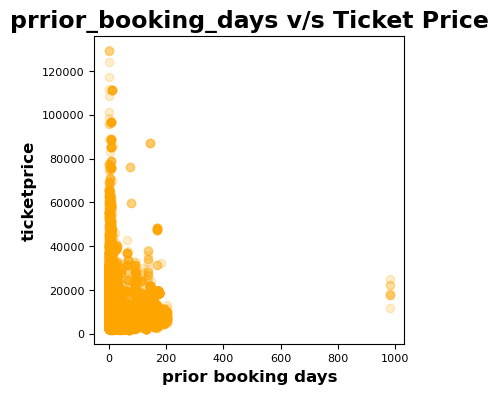

In [1716]:
# Scatter pLot- prrior_booking_days v/s Ticketprcie
plt.figure(figsize=(4,4))
plt.scatter(flight_train.prrior_booking_days, flight_train["ticketprice"], color='orange', alpha=1/5)
plt.title('prrior_booking_days v/s Ticket Price',fontsize=17, weight="bold")
plt.xlabel('prior booking days',fontsize=12, weight="bold")
plt.ylabel('ticketprice',fontsize=12, weight="bold")
plt.xticks(rotation=0,fontsize=8)
plt.yticks(fontsize=8)
plt.show(True)

##### Dropping unwanted columns and checking head of data that will be used for modelling

In [1717]:
flight_train.columns

Index(['TripID', 'departure', 'arrival', 'airline', 'planecode', 'plane',
       'Bookingdate', 'currencyCode', 'departure_airport', 'arrival_airport',
       'arrival_date_time', 'Route', 'ticketprice', 'Journey_Day',
       'Journey_WeekDay', 'Journey_Month', 'Dep_hour', 'Dep_Minute',
       'Arrival_hour', 'Arrival_Minute', 'booking_day', 'Bookingdate_hour',
       'Season', 'Daytime', 'mins_of_journey', 'prrior_booking_days',
       'No_of_stops'],
      dtype='object')

In [1718]:
# Dropping unwanted columns, that do not add much information
flight_train.drop(columns=['TripID','ticketprice', 'plane', 'Bookingdate', 'currencyCode', 'departure_airport', 'arrival_airport',
       'arrival_date_time','Route', 'Dep_hour', 'Dep_Minute', 'Arrival_hour',
       'Arrival_Minute' ],inplace=True)

In [1719]:
# Adding dummified columns to the test dataset
flight_train = pd.concat( [flight_train , airline ,departure , arrival, daytime, Season] , axis=1)

In [1720]:
# Dropping the categorical columns which were dummified
flight_train.drop(columns=['departure', 'arrival', 'airline', 'planecode','Bookingdate_hour','Daytime','Season'],inplace=True)

# Finally checking the test dataframe
flight_train.head(2)

,Journey_Day,Journey_WeekDay,Journey_Month,booking_day,mins_of_journey,prrior_booking_days,No_of_stops,SpiceJet,Vistara,departure_Chennai,departure_Hyderabad,departure_Mumbai,arrival_Amritsar,arrival_Bengaluru,arrival_Bhopal,arrival_Bhubaneshwar,arrival_Chennai,arrival_Coimbatore,arrival_Delhi,arrival_Goa,arrival_Hyderabad,arrival_Indore,arrival_Jaipur,arrival_Kolkata,arrival_Mangalore,arrival_Mumbai,arrival_Pune,arrival_Rajahmundry,arrival_Tirupati,arrival_Varanasi,arrival_Vijayawada,Peak Hours,Peak Season
0,24,2,5,1,450.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3,6,6,1150.0,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1721]:
flight_train.shape

(24000, 33)

## Pre-processing: Test data

In [1722]:
# 1. adding columns: day of the month of the journey, month of journey, day of week of the journey,
# the departure and arrival time

flight_test['Journey_Day'] = pd.to_datetime(flight_test.departure_date_time , format = '%d/%m/%Y %H:%M').dt.day
flight_test['Journey_WeekDay'] = pd.to_datetime(flight_test.departure_date_time , format = '%d/%m/%Y %H:%M').dt.weekday
flight_test['Journey_Month'] = pd.to_datetime(flight_test.departure_date_time , format = '%d/%m/%Y %H:%M').dt.month
flight_test['Depature_Time'] = pd.to_datetime(flight_test.departure_date_time , format = '%d/%m/%Y %H:%M').dt.time
flight_test['Arrival_Time'] = pd.to_datetime(flight_test.arrival_date_time , format = '%d/%m/%Y %H:%M').dt.time

In [1723]:
# 2. Creating columns: day of week of booking, hour of booking
flight_test['booking_day'] =pd.to_datetime(flight_test.Bookingdate , format = "%d%B%Y-%H:%M:%S").dt.weekday
flight_test['Bookingdate_hour'] =pd.to_datetime(flight_test.Bookingdate , format = "%d%B%Y-%H:%M:%S").dt.hour

In [1724]:
# 3. Creating column: if the booking was done in Peak season or not and peak hours or not

flight_test['Season']=flight_test['Journey_Month'].apply(season)
flight_test['Daytime']=flight_test['Bookingdate_hour'].apply(get_day_period)

In [1725]:
# 4. Finding duration of a flight in minutes, and adding it as a new column

from datetime import datetime
a=[]
b=[]
c=[]
mins=[]
for d in flight_test.departure_date_time:
    date1 = (datetime.strptime(d, "%d/%m/%Y %H:%M"))
    a.append(date1)
for d in flight_test.arrival_date_time:
    date2 = datetime.strptime(d, "%d/%m/%Y %H:%M")
    b.append(date2)
for i in range(len(flight_test.arrival_date_time)):
    difference= b[i]-a[i]
    c.append(difference)
    minutes =(b[i]-a[i]).total_seconds() / 60
    mins.append(minutes)
    
flight_test['mins_of_journey']= mins    

In [1726]:
# 5. Creating a column to find how many days before the flight was the ticket booked

flight_test.departure_date_time =pd.to_datetime(flight_test.departure_date_time , format = '%d/%m/%Y %H:%M')
flight_test['Bookingdate'] =pd.to_datetime(flight_test.Bookingdate , format = "%d%B%Y-%H:%M:%S")
flight_test['prrior_booking_days'] = (flight_test['departure_date_time']-flight_test['Bookingdate']  ).dt.days


In [1727]:
# 6. If the flight was direct or a connecting flight; to get the number of stops in each flight_test journey

stops=[]    
for i in range(len(flight_test.Route)):
    #test_str= flight_test.Route[i]
    counter= flight_test.Route[i].count('-')
    stops.append(counter-1)

flight_test['No_of_stops']= stops

In [1728]:
# 7. Dummifying categorical columns

planecode = flight_test['planecode']
planecode = pd.get_dummies(planecode , drop_first=True)

Season= flight_test['Season']
Season= pd.get_dummies(Season, drop_first=True)

daytime = flight_test['Daytime']
daytime = pd.get_dummies(daytime , drop_first=True)

airline = flight_test['airline']
airline = pd.get_dummies(airline , drop_first=True)

departure = flight_test[['departure']]
departure = pd.get_dummies(departure , drop_first=True)

arrival = flight_test[['arrival']]
arrival = pd.get_dummies(arrival , drop_first=True)

In [1729]:
flight_test.columns

Index(['TripID', 'departure', 'arrival', 'airline', 'planecode', 'plane',
       'Bookingdate', 'currencyCode', 'departure_airport',
       'departure_date_time', 'arrival_airport', 'arrival_date_time', 'Route',
       'Journey_Day', 'Journey_WeekDay', 'Journey_Month', 'Depature_Time',
       'Arrival_Time', 'booking_day', 'Bookingdate_hour', 'Season', 'Daytime',
       'mins_of_journey', 'prrior_booking_days', 'No_of_stops'],
      dtype='object')

In [1730]:
# Dropping unwanted columns, that do not add much information
flight_test.drop(columns=['TripID', 'plane', 'Depature_Time' , 'departure_date_time','Arrival_Time','Bookingdate',
                          'currencyCode', 'departure_airport', 'arrival_airport','arrival_date_time','Route' ],
                 inplace=True)

In [1731]:
# Adding dummified columns to the test dataset
flight_test = pd.concat( [flight_test , airline ,departure , arrival, daytime, Season] , axis=1)

In [1732]:
# Dropping the categorical columns which were dummified
flight_test.drop(columns=['departure', 'arrival', 'airline', 'planecode','Bookingdate_hour','Daytime','Season'],inplace=True)

In [1733]:
# Finally checking the test dataframe
flight_test.head()

,Journey_Day,Journey_WeekDay,Journey_Month,booking_day,mins_of_journey,prrior_booking_days,No_of_stops,SpiceJet,Vistara,departure_Chennai,departure_Hyderabad,departure_Mumbai,arrival_Amritsar,arrival_Bengaluru,arrival_Bhopal,arrival_Bhubaneshwar,arrival_Chennai,arrival_Coimbatore,arrival_Delhi,arrival_Goa,arrival_Hyderabad,arrival_Indore,arrival_Jaipur,arrival_Kolkata,arrival_Mangalore,arrival_Mumbai,arrival_Pune,arrival_Rajahmundry,arrival_Tirupati,arrival_Varanasi,arrival_Vijayawada,Peak Hours,Peak Season
0,12,0,6,4,315.0,16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,5,6,0,820.0,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,24,1,10,3,435.0,144,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,2,6,3,1360.0,6,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,2,7,6,410.0,38,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1734]:
flight_test.shape

(6000, 33)

In [1735]:
x_test= flight_test

In [1736]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Journey_Day           6000 non-null   int64  
 1   Journey_WeekDay       6000 non-null   int64  
 2   Journey_Month         6000 non-null   int64  
 3   booking_day           6000 non-null   int64  
 4   mins_of_journey       6000 non-null   float64
 5   prrior_booking_days   6000 non-null   int64  
 6   No_of_stops           6000 non-null   int64  
 7   SpiceJet              6000 non-null   uint8  
 8   Vistara               6000 non-null   uint8  
 9   departure_Chennai     6000 non-null   uint8  
 10  departure_Hyderabad   6000 non-null   uint8  
 11  departure_Mumbai      6000 non-null   uint8  
 12  arrival_Amritsar      6000 non-null   uint8  
 13  arrival_Bengaluru     6000 non-null   uint8  
 14  arrival_Bhopal        6000 non-null   uint8  
 15  arrival_Bhubaneshwar 

# Spliting Data

In [1737]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(flight_train, y, test_size=0.2, random_state=1513)

# Model Building

## Decision Tree Regressor

In [1738]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1513)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


DecisionTreeRegressor(random_state=1513)

In [1739]:
# predicting a new value

# test the output by changing values, like 3750
y_pred = regressor.predict(x_val)

# print the predicted price
print(y_pred)


[16242.  6347.  3318. ...  6190.  5220.  2477.]


In [1740]:
import matplotlib.pyplot as plt
path = regressor.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

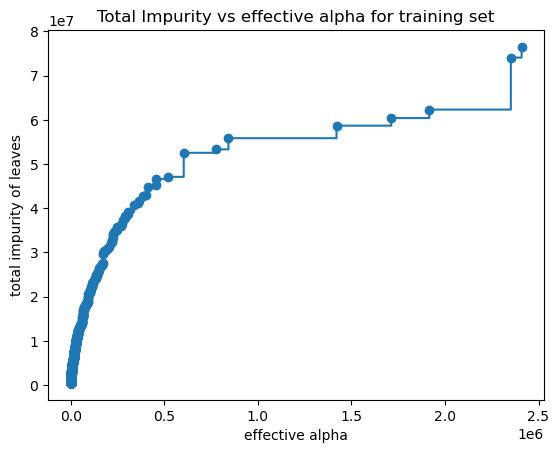

In [1741]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show(True)

In [1742]:
#model evaluation on TRAIN DATA
from sklearn import metrics
r_square= metrics.r2_score(y_val, y_pred)
print('R Squared error associated with Decision Tree is:', r_square)

R Squared error associated with Decision Tree is: 0.9066024540810521


In [1743]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_true=y_val,y_pred=y_pred)
mape = mean_absolute_percentage_error(y_true=y_val,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_val,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_val,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("MAPE:",mape)

MAE: 878.8548350346401
MSE: 8587748.528099468
RMSE: 2930.4860566294233
MAPE: 0.09461037863957783


In [1744]:
# Check about pruning the tree with decision tree regressor

In [1745]:
# Post pruning
# from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
# for v in ccp_alphas:
regressor = DecisionTreeRegressor(random_state = 1513, ccp_alpha = 0.65) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)
y_pred_pp = regressor.predict(x_val)
r_square_pp= metrics.r2_score(y_val, y_pred_pp)
print('R Squared error associated with Post-Prunned Decision Tree is:', r_square_pp)

R Squared error associated with Post-Prunned Decision Tree is: 0.9066126074990046


#### Predicting ticketprice on test data

In [1746]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_val)

# print the predicted price
print(y_pred)
y_test_pred = regressor.predict(x_test)

# print the predicted price
print(y_test_pred)


[16242.          6347.          3373.6        ...  6190.
  5220.          2514.33333333]
[ 5740.74 15286.    9582.   ... 13470.    2897.   12557.5 ]


In [1747]:
y_test_actual.head(2)

,TripID,ticketprice
0,Trip12332,5742
1,Trip22633,15286


In [1748]:
y_test = y_test_actual['ticketprice']

In [1749]:
# Error metrics for entire tree
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_test_pred)
print("MAPE:",mape)

MAPE: 0.09769625235832831


In [1750]:
regressor2 = DecisionTreeRegressor(random_state = 1513, ccp_alpha = 0.63) 
regressor2.fit(x_train, y_train)

y_test_pred2 = regressor2.predict(x_test)

# print the predicted price
print(y_test_pred2)

# Error metrics of post pruned tree 
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_test_pred2)

print("MAPE:",mape)

[ 5740.74 15286.    9582.   ... 13470.    2897.   12557.5 ]
MAPE: 0.09767247951772737


In [1751]:
results = pd.DataFrame({'TripID':trip_id_test,'ticketprice':y_test_pred2})

In [1752]:
results.to_csv("decision_tree_results.csv")

In [1753]:
results.head(5)

,TripID,ticketprice
0,Trip12332,5740.74
1,Trip22633,15286.00
2,Trip33581,9582.00
3,Trip36239,16745.36
4,Trip21625,6338.00


In [1754]:
# import os
# os.environ["PATH"] += os.pathsep +"C:/Users/Dhwani Bhandari/anaconda3/Library/bin/graphviz"

In [1661]:
# from graphviz import Source
# from sklearn import tree

In [1662]:
# #Display it in Jupiter
# from IPython.display import SVG
# graph = Source( tree.export_graphviz(regressor, out_file=None, 
#                                      feature_names=x_train.columns))
# SVG(graph.pipe(format='svg'))

In [ ]:
# #save as png
# graph = Source( tree.export_graphviz(regressor2, out_file=None,
#                                      feature_names=x_train.columns))
# graph.format = 'png'
# graph.render('dtree_image',view=True)